1. Data Collection
2. Import libraries
3. EDA
4. Data Preprocessing
5. Splitting dataset
6. Choosing model for dataset
7. Evaluating model

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df=df.iloc[:,::3]

In [5]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [6]:
import matplotlib.pyplot as plt

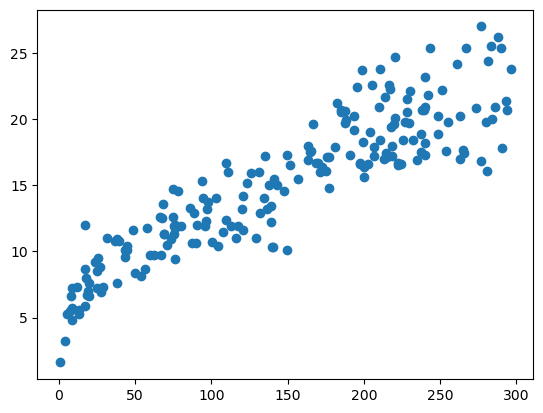

In [7]:
plt.plot(df['TV'],df['Sales'],'o')

In [8]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [11]:
df.corr()

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [13]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [14]:
x=df[['TV']]
y=df['Sales']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

In [17]:
x_train.head()

,TV
154,187.8
130,0.7
61,261.3
87,110.7
102,280.2


In [18]:
y_train

154    20.6
130     1.6
61     24.2
87     16.0
102    19.8
       ... 
113    20.9
64     16.0
15     22.4
125    10.6
9      15.6
Name: Sales, Length: 180, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
m=model.coef_[0]

In [23]:
c=model.intercept_

In [24]:
m*(187.8)+c

17.182638674980527

In [25]:
model.predict([[187.8]])

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.18263867])

In [26]:
train_pred=model.predict(x_train)

In [27]:
test_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
mean_absolute_error(y_train,train_pred)

1.8058752989693831

In [30]:
mean_squared_error(y_train,train_pred)

5.05762791063979

In [31]:
(mean_squared_error(y_train,train_pred))**(1/2)

2.248917052858951

In [32]:
r2_score(y_train,train_pred)

0.8071081465254404

In [33]:
mean_absolute_error(y_test,test_pred)

2.1120832090095654

In [34]:
r2_score(y_test,test_pred)

0.7962605828242924

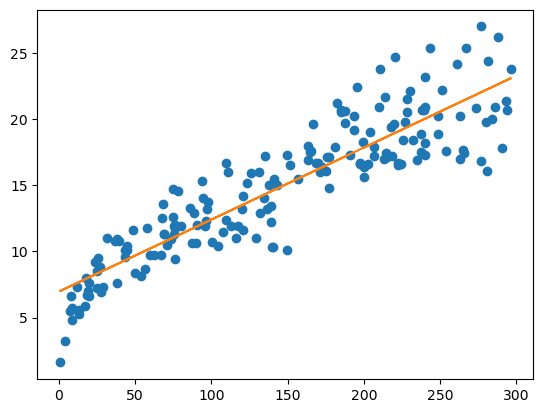

In [35]:
plt.plot(x_train,y_train,'o')
plt.plot(x_train,train_pred);

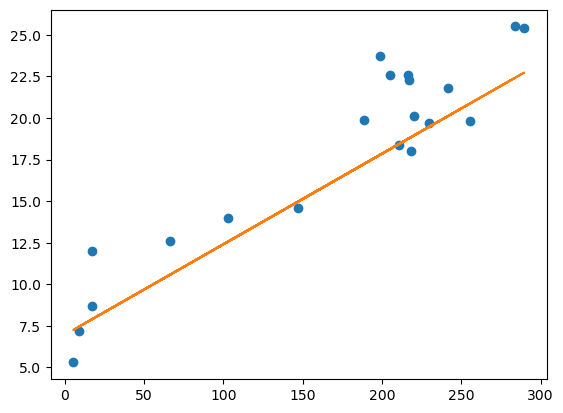

In [36]:
plt.plot(x_test,y_test,'o')
plt.plot(x_test,test_pred);

In [37]:
model.score(x,y)

0.8108973515033019

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
ss=StandardScaler()

In [40]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [41]:
df['TV'].mean()

147.0425

In [42]:
df['TV'].std()

85.8542363149081

In [43]:
(230.1-147.0425)/85.8542363149081

0.9674245973763037

In [44]:
df['TV1']=ss.fit_transform(df[['TV']])

C:\Users\PC\AppData\Local\Temp\ipykernel_1564\1800261877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TV1']=ss.fit_transform(df[['TV']])


In [45]:
df.head()

,TV,Sales,TV1
0,230.1,22.1,0.969852
1,44.5,10.4,-1.197376
2,17.2,12.0,-1.516155
3,151.5,16.5,0.052050
4,180.8,17.9,0.394182


In [46]:
x=df[['TV1']]
y=df['Sales']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=100)

In [48]:
model1=LinearRegression()

In [49]:
model1.fit(x_train,y_train)

LinearRegression()

In [50]:
train_pred=model1.predict(x_train)

In [51]:
r2_score(y_train,train_pred)

0.8103067443785548

In [52]:
mean_absolute_error(y_train,train_pred)

1.8512073211420002

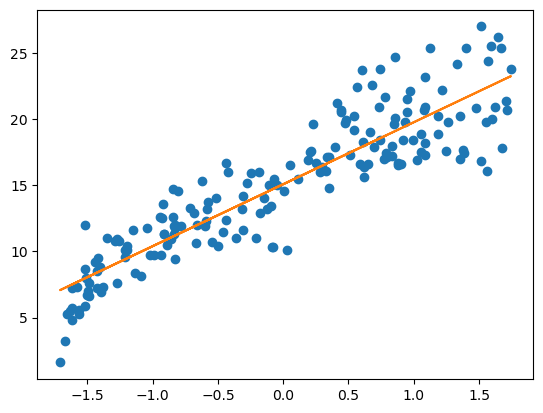

In [54]:
plt.plot(x_train,y_train,'o')
plt.plot(x_train,train_pred);